In [33]:
# Learning Outcomes: Matplotlb - Seaborn - Scikit-learn |

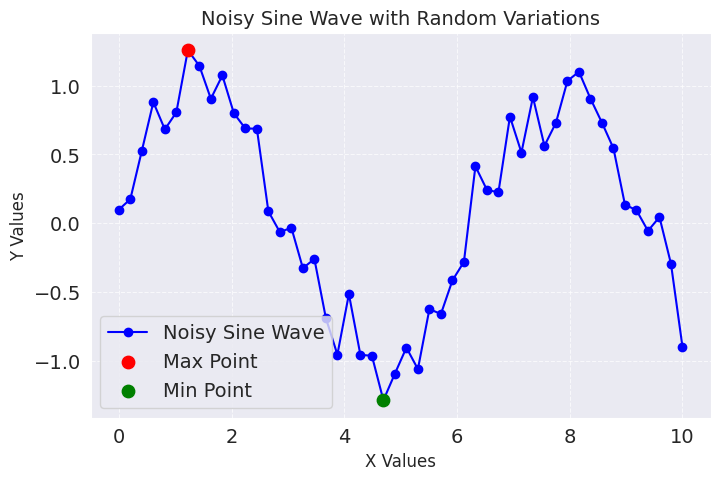

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some data for the plot
np.random.seed(42)
x = np.linspace(0, 10, 50)
y = np.sin(x) + np.random.normal(scale=0.2, size=50)

# Create the figure and axis
fig, ax = plt.subplots(figsize=(8, 5))

# Plot the data
ax.plot(x, y, marker='o', linestyle='-', color='b', label='Noisy Sine Wave')

# Add labels and title
ax.set_xlabel("X Values", fontsize=12)
ax.set_ylabel("Y Values", fontsize=12)
ax.set_title("Noisy Sine Wave with Random Variations", fontsize=14)

# Add a grid
ax.grid(True, linestyle='--', alpha=0.7)

# Highlight max and min points
ax.scatter(x[np.argmax(y)], max(y), color='red', label='Max Point', s=80, zorder=3)
ax.scatter(x[np.argmin(y)], min(y), color='green', label='Min Point', s=80, zorder=3)

# Add a legend
ax.legend()

# Show the plot
plt.show()

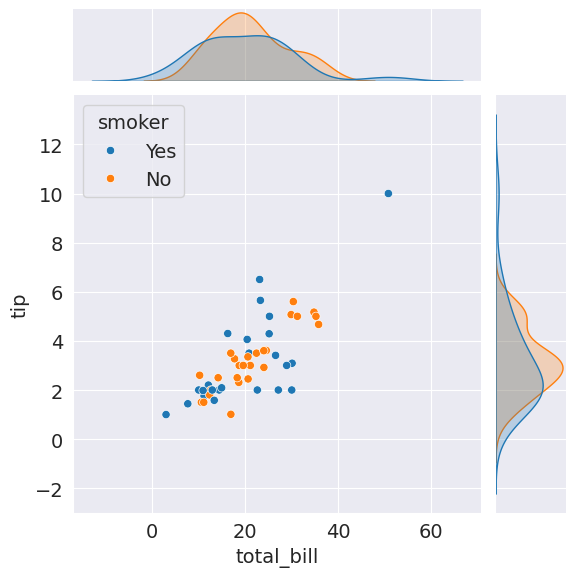

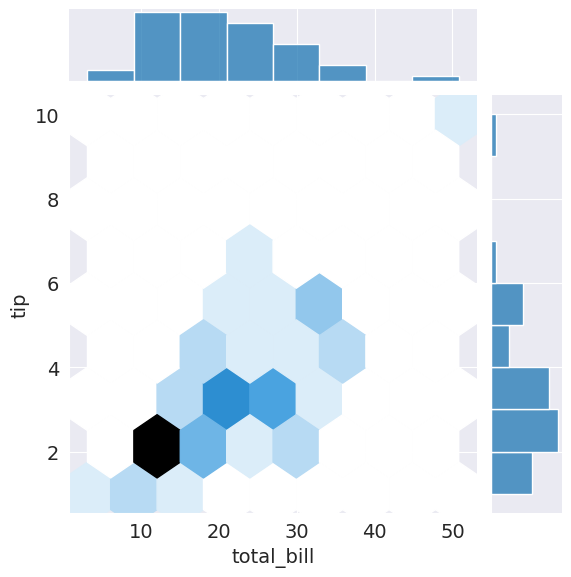

In [35]:
import seaborn as sns
df = sns.load_dataset('tips')
df = df.sample(n=50, random_state=1)
df.head(3)
sns.jointplot(data=df, y='tip', x='total_bill', hue='smoker')
plt.show()
sns.jointplot(data=df, x='total_bill', y='tip', kind='hex')
plt.show()

In [36]:
import numpy as np
import pandas as pd
import plotly.express as px # Interactive charts and save some coding; .express - high-level api
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
# Change settings to improve default style (optional)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [42]:
data_path = r'N:\Y3\TB2\Big Data\Tut Project\medical-charges.csv'

In [43]:
medical_df = pd.read_csv(data_path)

FileNotFoundError: [Errno 2] No such file or directory: 'N:\\Y3\\TB2\\Big Data\\Tut Project\\medical-charges.csv'

In [ ]:
# Can you remember that three magic commands to display information and summary of the dataset?

In [ ]:
print(medical_df['charges'].corr(medical_df['age']))
print(medical_df['charges'].corr(medical_df['bmi']))
print(medical_df['charges'].corr(medical_df['children']))

In [ ]:
smoker_values = {'no':0, 'yes':1}
smoker_numeric = medical_df['smoker'].map(smoker_values)
medical_df['charges'].corr(smoker_numeric)

NameError: name 'medical_df' is not defined

In [ ]:
medical_df.select_dtypes(include='number').corr()

In [ ]:
sns.heatmap(
    medical_df.select_dtypes(include='number').corr(),
    cmap='Reds',
    annot=True    
)
plt.title("Correlation matrix")
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()  # Create a model variable and assign linear regression model to it

In [ ]:
help(model.fit)

In [ ]:
non_smoker_df = medical_df[medical_df['smoker'] == 'no'] # Either line will work. Just different syntaxes; But I like no 1 more.
non_smoker_df.head(3)

In [ ]:
inputs = non_smoker_df[['age']] # required to be 2D array. We want a dataframe, not a series.
targets = non_smoker_df['charges'] # There is only one dependent variable => no 2D notation is required.
print("Inputs shape", inputs.shape) # Output: (1064, 1) -> First number is how many lines; 2nd number is how many columns.
print("targets", targets.shape)

In [ ]:
model.fit(inputs, targets)

In [ ]:
model.predict(np.array([
    [23],
    [37],
    [61]
]))

In [ ]:
predictions = model.predict(inputs)
print(predictions)

In [ ]:
def rmse(targets, predictions):
    """
    Returns RMSE for targets and prediction values.
    """
    return np.sqrt(np.mean(np.square(predictions - targets)))

In [ ]:
rmse(targets, predictions) # Output USD 4662.5. Meaning on average we are away from the target by this number.


In [ ]:
# w:
print(model.coef_)
# b:
print(model.intercept_)

In [ ]:
# Create inputs and targets:
inputs, targets = non_smoker_df[['age', 'bmi']], non_smoker_df['charges']
# Create and train the model:
model = LinearRegression().fit(inputs, targets)
# Run predictions:
predictions = model.predict(inputs)  # inputs [[22, 20]]
print(f"Predicted charge is: {predictions}")
# Compute loss to evaluate model:
loss = rmse(targets, predictions)
print(f"The loss is: {round(loss, 2)}")

In [ ]:
inputs.head()
inputs.shape
non_smoker_df['charges'].corr(non_smoker_df['bmi'])
fig = px.scatter(
    non_smoker_df,
    x='bmi',
    y='charges',
    title="BMI vs. Charges"
)
fig.update_traces(marker_size=5)
fig.show()

In [ ]:
fig = px.scatter_3d(
    non_smoker_df,
    x='age',
    y='bmi',
    z='charges'
)
fig.update_traces(marker_size=3, marker_opacity=0.8)
fig.show()
print("Model coefficient and intercept are:")
print(model.coef_)
print(round(model.intercept_, 2))
non_smoker_df['children'].corr(non_smoker_df['charges'])
fig = px.strip(
    non_smoker_df,
    x='children',
    y='charges',
    title="Children vs. Charges"    
)
fig.update_traces(marker_size=4, marker_opacity=0.7)
fig.show()

In [ ]:
# Create inputs and targets:
inputs, targets = medical_df[['age', 'bmi', 'children']], medical_df['charges']
# Create and train the model:
model = LinearRegression().fit(inputs, targets)
# Run predictions:
predictions = model.predict(inputs)
# compute the loss and evaluate the model:
loss = rmse(targets, predictions)
print(f"The loss is: {round(loss, 2)}")
"""
The output of the above code will be way much higher because smoker/non-smoker feature makes distinct clusters - see plot below.
"""

In [ ]:
px.scatter(
    medical_df,
    x='age',
    y='charges',
    color='smoker',
    title="Charges vs. Age"
)

In [ ]:
sns.barplot(data=medical_df, x='smoker', y='charges')
smoker_codes = {'no': 0, 'yes': 1}
medical_df['smoker_code'] = medical_df.smoker.map(smoker_codes)
medical_df['charges'].corr(medical_df['smoker_code'])
medical_df

In [ ]:
# Create inputs and targets
inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker_code']], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

In [ ]:
sns.barplot(data=medical_df, x='sex', y='charges')
sex_codes = {'female': 0, 'male': 1}
medical_df['sex_code'] = medical_df.sex.map(sex_codes)
medical_df['charges'].corr(medical_df['sex_code'])
# Create inputs and targets
inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker_code', 'sex_code']], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

In [ ]:
sns.barplot(data=medical_df, x='region', y='charges')
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(medical_df[['region']])
enc.categories_
one_hot = enc.transform(medical_df[['region']]).toarray()
one_hot
medical_df[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot
medical_df.head()

In [ ]:
# Create inputs and targets
input_cols = ['age', 'bmi', 'children', 'smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
inputs, targets = medical_df[input_cols], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

In [ ]:
from sklearn.model_selection import train_test_split
inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, targets, test_size=0.1)
# Create and train the model
model = LinearRegression().fit(inputs_train, targets_train)

# Generate predictions
predictions_test = model.predict(inputs_test)

# Compute loss to evalute the model
loss = rmse(targets_test, predictions_test)
print('Test Loss:', loss)

In [ ]:
# Generate predictions
predictions_train = model.predict(inputs_train)

# Compute loss to evalute the model
loss = rmse(targets_train, predictions_train)
print('Training Loss:', loss)

In [ ]:
john_smith = {
	"age": [30],             # Example age
    "bmi": [29.5],           # Example BMI
    "children": [2],         # Example number of children
    "smoker_code": [0],      # Smoker (1 for yes, 0 for no)
    "sex_code": [0],         # Male (1), Female (0)
    "northeast": [0],        # One-hot encoded region:
    "northwest": [1],
    "southeast": [0],
    "southwest": [0]

In [ ]:
single_person = pd.DataFrame(john_smith)
single_person.head()

In [ ]:
single_prediction = model.predict(single_person)
print(f"Predicted health insurance charge for John Smith is {single_prediction[0]:.1f} USD")

In [ ]:
residuals = targets_train - predictions_train  # Compute residuals (errors)
std_dev = np.std(residuals)  # Compute the standard deviation of residuals
confidence_interval = 1.96 * std_dev  # Confidence interval (for 95% confidence level, 1.96 standard deviations)

# Make a single prediction
# single_prediction = model.predict(single_person)[0]

# Compute lower and upper bounds for prediction interval
lower_bound = single_prediction - confidence_interval
upper_bound = single_prediction + confidence_interval

print(f"Predicted value: {single_prediction}")
print(f"95% Prediction Interval: ({lower_bound}, {upper_bound})")